# Immo Eliza Project - Part 3: Data Analysis

## 1. Data Import and Cleaning

### 1.1 Basic Import and Cleaning

In [107]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('property_data.csv')

df.drop_duplicates(inplace=True)  # Drop duplicate rows
df.drop(['Raw num:','URL', 'ID number', 'Number of facades'], axis=1, inplace=True) # Drop irrelevant columns

# Fill NaN values with a specific value
clean_values = {'Kitchen': 0, 'Terrace': 0, 'Garden': 0, 'Swimming Pool': 0}
df.fillna(clean_values, inplace=True)

#df = df.dropna()
df = df.dropna(subset=['Zip code','Price of property in euro','Number of bedrooms','Living area',]) # Drop rows with NaN values in specific columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x) # Strip leading/trailing whitespace from strings

# Perform data transformations where needed
# df['new_column'] = df['column_name'].apply(function)  # Apply a function to a column

# Ensure consistent formats
int_columns = ['Zip code', 'Kitchen', 'Price of property in euro','Number of bedrooms','Living area', 'Terrace','Garden','Garden area', 'Surface of the land(or plot of land)']
df[int_columns] = df[int_columns].apply(lambda x: pd.to_numeric(x, errors='coerce').astype('Int64')) # Change the non-NaN values into integers

### 1.2 Cleaning Up the Localities and Zip Codes

In [67]:
# Replace locality values using the mapping from the xlsx file
scraped_data = pd.read_excel('zip_clean.xlsx', usecols=['Postcode', 'Gemeente'])

# Group the scraped data by Postcode and select the first Gemeente in each group
scraped_data = scraped_data.groupby('Postcode')['Gemeente'].first().reset_index()

# Create a mapping dictionary from the xlsx DataFrame
mapping_dict = dict(zip(scraped_data['Postcode'], scraped_data['Gemeente']))

# Update the Locality values in 'df' using the mapping dictionary
df['Locality'] = df['Zip code'].map(mapping_dict)

display(df.head(5)) 
df.info("locality")

,Locality,Zip code,Kitchen,Type of property,Subtype of property,Price of property in euro,Type of Sale,Number of bedrooms,Living area,Terrace,Garden,Garden area,Surface of the land(or plot of land),Swimming pool,State of the building
0,Seraing,4100,1,house,house,149000,NaN,2,105,1,1,25,105,NaN,good
1,Gent,9000,1,house,house,319000,NaN,3,154,0,1,8,55,NaN,to be done up
2,Braine-l'Alleud,1420,1,house,house,320000,NaN,3,88,1,1,250,405,NaN,good
3,Anderlecht,1070,1,house,exceptional property,960000,NaN,6,400,1,1,290,1090,NaN,as new
4,Waterloo,1410,1,house,villa,498000,NaN,5,140,1,1,700,1132,NaN,to be done up


<class 'pandas.core.frame.DataFrame'>
Index: 11013 entries, 0 to 11195
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Locality                              11004 non-null  object 
 1   Zip code                              11013 non-null  Int64  
 2   Kitchen                               11013 non-null  Int64  
 3   Type of property                      11013 non-null  object 
 4   Subtype of property                   11013 non-null  object 
 5   Price of property in euro             11013 non-null  Int64  
 6   Type of Sale                          2428 non-null   object 
 7   Number of bedrooms                    11013 non-null  Int64  
 8   Living area                           11013 non-null  Int64  
 9   Terrace                               11013 non-null  Int64  
 10  Garden                                11013 non-null  Int64  
 11  Garden area         

## 2. Data Analysis

In [ ]:
# TBD

## 3. Data Interpretation

### 3.1 What are the MOST expensive municipalities in Belgium?

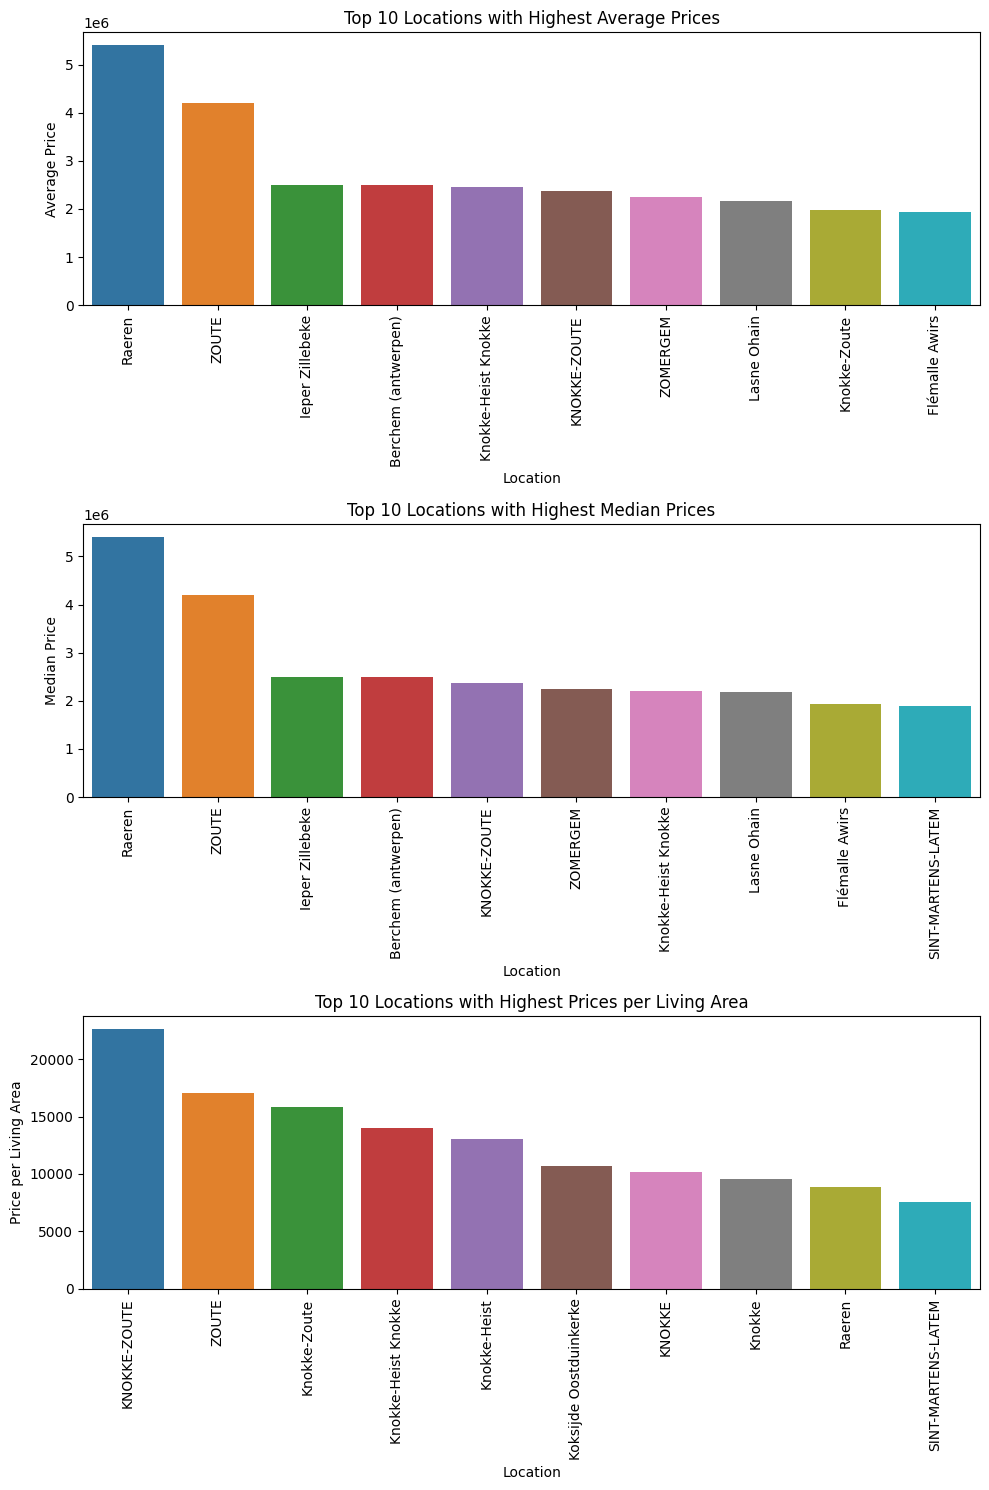

In [178]:
val = 10

# Calculate the top zip codes with highest average prices
top_avg_prices = df.groupby('Locality')['Price of property in euro'].mean().nlargest(val)

# Calculate the top zip codes with highest median prices
top_median_prices = df.groupby('Locality')['Price of property in euro'].median().nlargest(val)

# Calculate the top zip codes with highest prices per living area
df['Price per Living Area'] = df['Price of property in euro'] / df['Living area']
top_prices_per_area = df.groupby('Locality')['Price per Living Area'].mean().nlargest(val)

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(val, 15))

# Plot the top zip codes with highest average prices
sns.barplot(x=top_avg_prices.index, y=top_avg_prices.values, ax=axes[0])
axes[0].set_title('Top ' + str(val) + ' Locations with Highest Average Prices')
axes[0].set_xlabel('Location')
axes[0].set_ylabel('Average Price')

# Rotate x-axis labels for the first graph
axes[0].tick_params(axis='x', rotation=90)

# Plot the top x zip codes with highest median prices
sns.barplot(x=top_median_prices.index, y=top_median_prices.values, ax=axes[1])
axes[1].set_title('Top ' + str(val) + ' Locations with Highest Median Prices')
axes[1].set_xlabel('Location')
axes[1].set_ylabel('Median Price')

# Rotate x-axis labels for the second graph
axes[1].tick_params(axis='x', rotation=90)

# Plot the top x zip codes with highest prices per living area
sns.barplot(x=top_prices_per_area.index, y=top_prices_per_area.values, ax=axes[2])
axes[2].set_title('Top ' + str(val) + ' Locations with Highest Prices per Living Area')
axes[2].set_xlabel('Location')
axes[2].set_ylabel('Price per Living Area')

# Rotate x-axis labels for the third graph
axes[2].tick_params(axis='x', rotation=90)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


### 3.9 What are the LEAST expensive municipalities in Belgium?

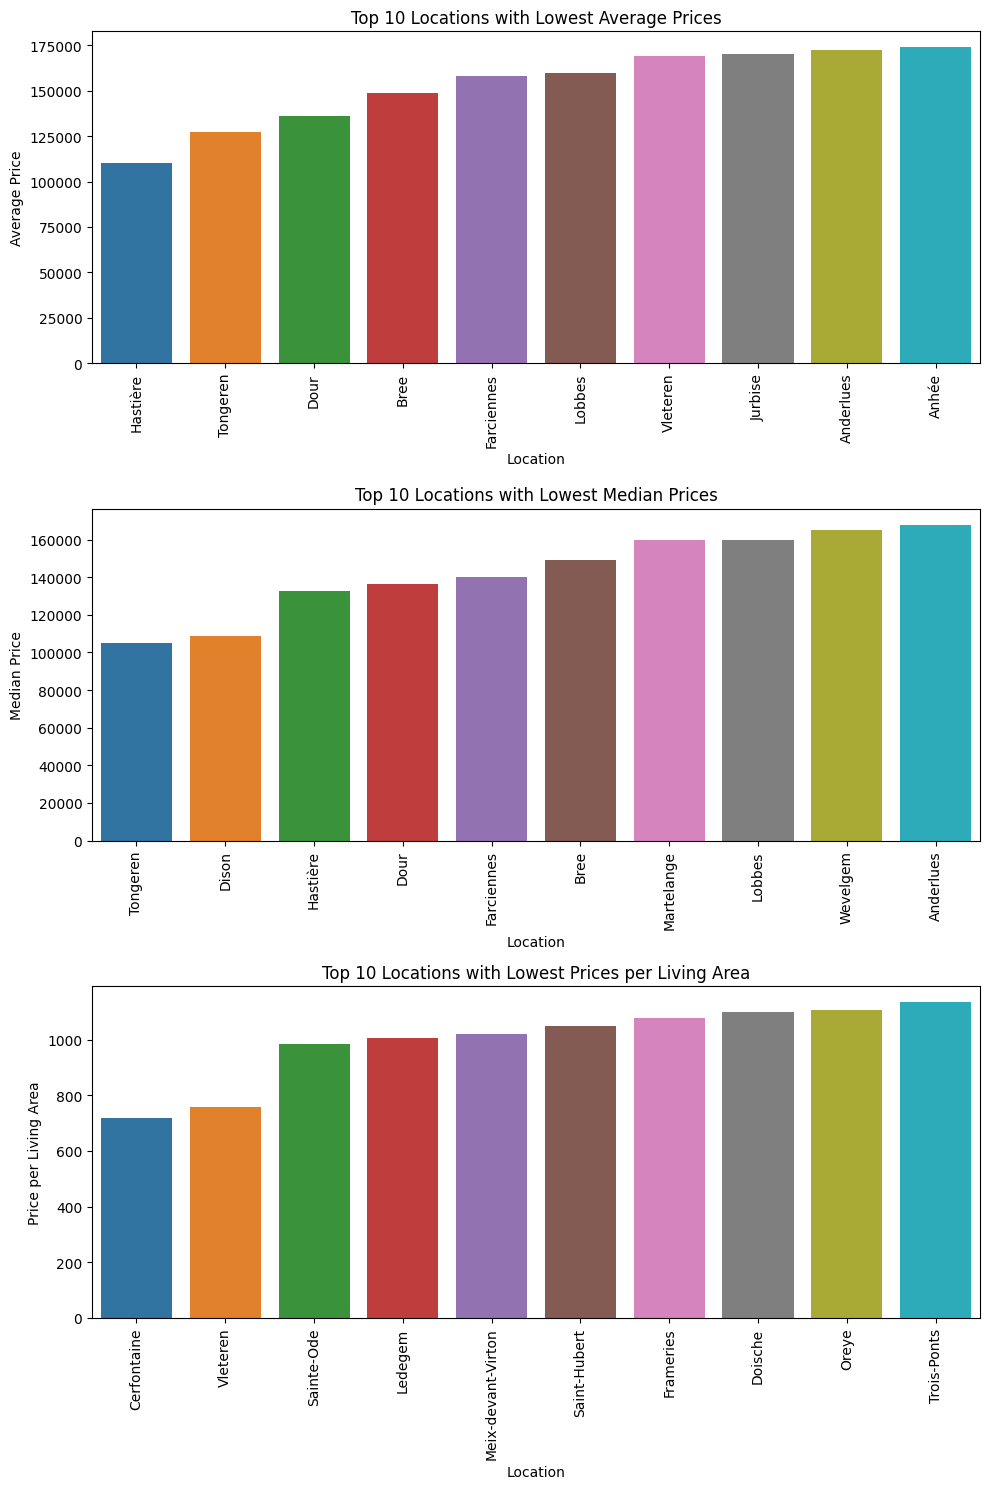

In [69]:
val = 10

# Calculate the top zip codes with lowest average prices
bottom_avg_prices = df.groupby('Locality')['Price of property in euro'].mean().nsmallest(val)

# Calculate the top zip codes with lowest median prices
bottom_median_prices = df.groupby('Locality')['Price of property in euro'].median().nsmallest(val)

# Calculate the top zip codes with lowest prices per living area
df['Price per Living Area'] = df['Price of property in euro'] / df['Living area']
bottom_prices_per_area = df.groupby('Locality')['Price per Living Area'].mean().nsmallest(val)

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(val, 15))

# Plot the top zip codes with lowest average prices
sns.barplot(x=bottom_avg_prices.index, y=bottom_avg_prices.values, ax=axes[0])
axes[0].set_title('Top ' + str(val) + ' Locations with Lowest Average Prices')
axes[0].set_xlabel('Location')
axes[0].set_ylabel('Average Price')

# Rotate x-axis labels for the first graph
axes[0].tick_params(axis='x', rotation=90)

# Plot the top x zip codes with lowest median prices
sns.barplot(x=bottom_median_prices.index, y=bottom_median_prices.values, ax=axes[1])
axes[1].set_title('Top ' + str(val) + ' Locations with Lowest Median Prices')
axes[1].set_xlabel('Location')
axes[1].set_ylabel('Median Price')

# Rotate x-axis labels for the second graph
axes[1].tick_params(axis='x', rotation=90)

# Plot the top x zip codes with lowest prices per living area
sns.barplot(x=bottom_prices_per_area.index, y=bottom_prices_per_area.values, ax=axes[2])
axes[2].set_title('Top ' + str(val) + ' Locations with Lowest Prices per Living Area')
axes[2].set_xlabel('Location')
axes[2].set_ylabel('Price per Living Area')

# Rotate x-axis labels for the third graph
axes[2].tick_params(axis='x', rotation=90)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


### 3.10 How does price relate to living area per location?

In [109]:
np.where(df['Price per Living Area'] > 20000, 20000, df['Price per Living Area'])


array([1419, 2071, 3636, ..., 1550, 9739, 3700])

In [112]:
sum(np.where(df['Price per Living Area'] > 15000, 1, 0))


93

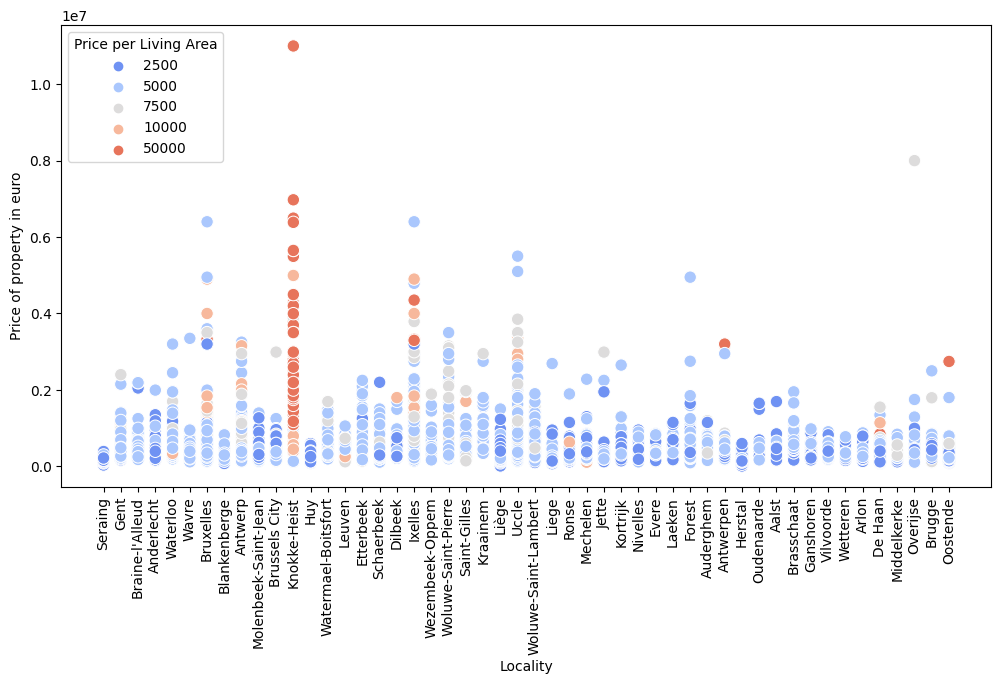

In [187]:
# Exclude NaN values in the 'State of the building' column
df_filtered = df.dropna(subset=['State of the building'])

# Calculate the Price per Living Area as integers
df['Price per Living Area'] = (df['Price of property in euro'] / df['Living area']).astype(int)
# df['Price per Living Area'] = np.where(df['Price per Living Area'] > 10000, 10000, df['Price per Living Area'])

# Define the hue bins and labels manually
hue_bins = [0, 2500, 5000, 7500, 10000, 50000]
hue_labels = [2500, 5000, 7500, 10000, 50000]

# Categorize the 'Price per Living Area' into bins with labels
df['Hue'] = pd.cut(df['Price per Living Area'], bins=hue_bins, labels=hue_labels)

# Get the top 50 locations by count
top_locations = df_filtered['Locality'].value_counts().nlargest(50).index

# Filter the dataframe to include only the top 100 locations
df_top_locations = df_filtered[df_filtered['Locality'].isin(top_locations)]

# Set the palette as a gradient from lowest to highest value
palette = sns.color_palette("coolwarm", n_colors=len(hue_labels))

# Increase the figure size
plt.figure(figsize=(12, 6))

# Create the scatter plot with adjusted data point size and manually set hue bins
sns.scatterplot(x="Locality", y="Price of property in euro", hue="Hue", palette=palette, data=df_top_locations, s=80)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Set the hue legend label
plt.legend(title='Price per Living Area')

# Show the plot
plt.show()


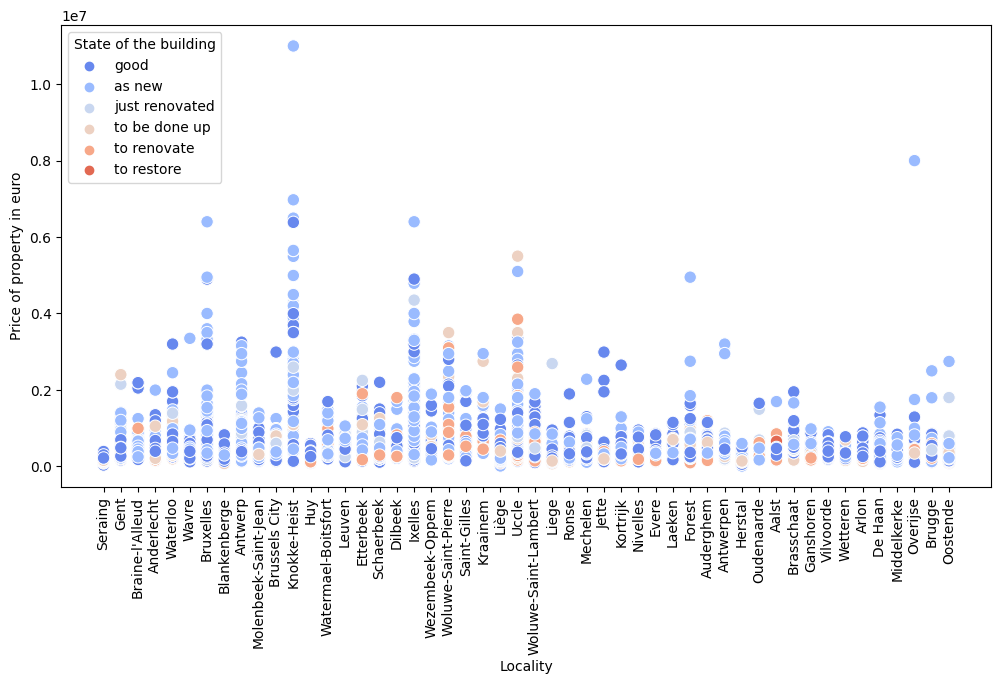

In [157]:
# Exclude NaN values in the 'State of the building' column
df_filtered = df.dropna(subset=['State of the building'])

# Get the top 50 locations by count
top_locations = df_filtered['Locality'].value_counts().nlargest(50).index

# Filter the dataframe to include only the top 100 locations
df_top_locations = df_filtered[df_filtered['Locality'].isin(top_locations)]

# Create a custom color palette for the 'State of the building' categories
palette = sns.color_palette("coolwarm", n_colors=6)

# Define the desired order of hue labels
hue_order = ['good', 'as new', 'just renovated', 'to be done up', 'to renovate', 'to restore']

# Increase the figure size
plt.figure(figsize=(12, 6))

# Create the scatter plot with adjusted data point size and manually set hue colors
sns.scatterplot(x="Locality", y="Price of property in euro", hue="State of the building", hue_order=hue_order, palette=palette, data=df_top_locations, s=80, label="State of the building over ")

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.show()
